In [2]:
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
import scipy.io
import seaborn as sns
import pandas as pd

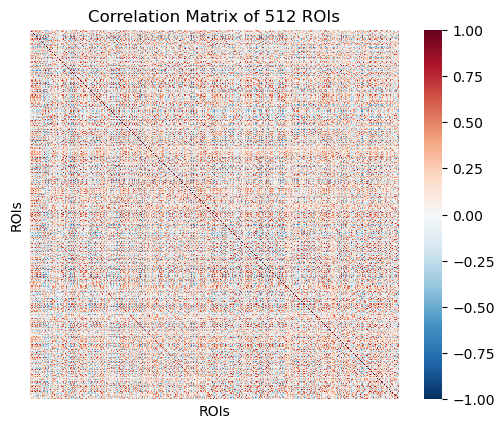

In [3]:
#load the parcellation data

#load the single data
def select_network(id, visual = False):
    single_subj = scipy.io.loadmat(f'../../data4project/512Results_Functional/{id}/ROICorrelation_{id}.mat')
    if visual:
        sns.heatmap(single_subj['ROICorrelation'][:90, :90], cmap='RdBu_r', center=0, vmin = -1, vmax = 1, square=True, xticklabels=False, yticklabels=False)
        plt.title('Correlation Matrix of 90 ROIs')
        plt.xlabel('ROIs')
        plt.ylabel('ROIs')
        plt.show()
    return single_subj['ROICorrelation'][:90, :90]
id1 = '0306A'
id2 = '7416A'
single_subj = select_network(id1)

/var/folders/s2/p1qgp3rx7wz63mc5wkrqb7yw0000gp/T/ipykernel_40073/1780200301.py:19: FutureWarning: adjacency_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.
  adjacency_matrix = np.array(nx.adjacency_matrix(G).todense().T)


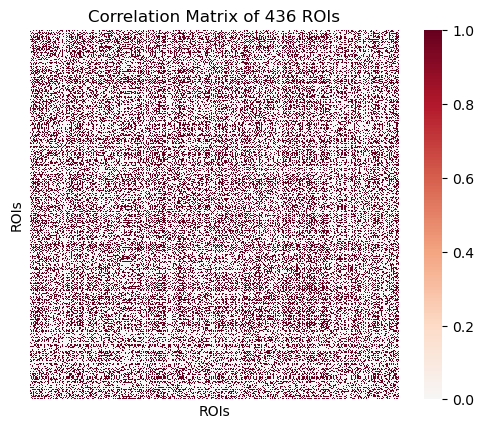

In [57]:
def build_network(correlation_matrix, threshold):
    # create a networkx graph
    G = nx.Graph()
    # add nodes with the label being the index of the roi
    G.add_nodes_from(range(correlation_matrix.shape[0]))
    # add edges to the graph for connections above a threshold
    for i in range(correlation_matrix.shape[0]):
        for j in range(i, correlation_matrix.shape[0]):
            if correlation_matrix[i, j] > threshold or correlation_matrix[i, j] < -threshold:
                G.add_edge(i, j, )
    return G

# build the network
G = build_network(single_subj, threshold=0.3)
# draw the network
adjacency_matrix = np.array(nx.adjacency_matrix(G).todense().T)
sns.heatmap(adjacency_matrix, cmap='RdBu_r', center=0, square=True, xticklabels=False, yticklabels=False)
plt.title('Correlation Matrix of 90 ROIs')
plt.xlabel('ROIs')
plt.ylabel('ROIs')
plt.show()

In [58]:
nx.write_gml(G, 'fc_network.gml')

In [59]:
print(G.number_of_nodes())
print(G.number_of_edges())

436
32658
